In [224]:
import numpy as np
import pandas as pd
import seaborn as sns
import nibabel as nib
import matplotlib.pyplot as plt
import nibabel.freesurfer.mghformat as mgh

from glob import glob
from os.path import join, exists
from nilearn import plotting, datasets, image

In [3]:
sns.set(style='whitegrid', context='talk')
plt.rcParams["font.family"] = "monospace"
plt.rcParams['font.monospace'] = 'Courier New'

In [9]:
ABCD_DIR = "/Volumes/projects_herting/LABDOCS/PROJECTS/ABCD/Data/release4.0"
PROJ_DIR = "/Volumes/projects_herting/LABDOCS/Personnel/Katie/deltaABCD_clustering/"
DATA_DIR = "data/"
FIGS_DIR = "figures/"
OUTP_DIR = "output/"

In [10]:
data_dictionary = pd.read_csv(join(ABCD_DIR, 'generate_dataset/data_element_names.csv'), 
                              header=0, 
                              index_col=0)

In [12]:
data = pd.read_csv(join(PROJ_DIR, DATA_DIR, "data.csv"), index_col=0, header=0)

In [16]:
smri_vars = pd.concat([data.filter(regex='smri.*change_score'), 
                                data.filter(regex='mrisdp.*change_score')], axis=1).dropna(how='all').columns
rsfmri_vars = data.filter(regex='rsfmri.*change_score').dropna(how='all').columns
rsi_vars = data.filter(regex='dmri_rsi.*change_score').dropna(how='all').columns
dti_vars = data.filter(regex='dmri_dti.*change_score').dropna(how='all').columns

In [43]:
smri_vars = [v.split('.')[0] for v in smri_vars]
rsfmri_vars = [v.split('.')[0] for v in rsfmri_vars]
rsi_vars = [v.split('.')[0] for v in rsi_vars]
dti_vars = [v.split('.')[0] for v in dti_vars]

In [44]:
imaging_vars = list(smri_vars) + list(rsfmri_vars) + list(rsi_vars) + list(dti_vars)

In [65]:
mapping = pd.DataFrame(columns=['modality', 
                                'abcd_structure',
                                'abcd_description', 
                                'atlas_description', 
                                'atlas', 
                                'atlas_value'])

In [66]:
for i in imaging_vars:
    if i in smri_vars:
        mapping.at[i, 'modality'] = 'smri'
    elif i in rsfmri_vars:
        mapping.at[i, 'modality'] = 'fmri' 
    elif i in rsi_vars:
        mapping.at[i, 'modality'] = 'rsi'
    elif i in dti_vars:
        mapping.at[i, 'modality'] = 'dti'
    mapping.at[i, 'abcd_description'] = data_dictionary.loc[i]['description']
    mapping.at[i, 'abcd_structure'] = data_dictionary.loc[i]['structure']
    if '_scs_' in i:
        mapping.at[i, 'atlas'] = 'Subcortical'
    elif 'gordon' in i:
        mapping.at[i, 'atlas'] = 'Gordon'
    elif '_cdk_' in i:
        mapping.at[i, 'atlas'] = 'Desikan'
    elif 'mrisdp' in i:
        mapping.at[i, 'atlas'] = 'Destrieux'
    elif '_cf12_' in i:
        mapping.at[i, 'atlas'] = 'Fuzzy 12'
    elif 'fib' in i:
        mapping.at[i, 'atlas'] = 'Fiber Atlas'

In [68]:
destrieux = datasets.fetch_atlas_surf_destrieux()
destrieux_vol = datasets.fetch_atlas_destrieux_2009()
desikan = datasets.fetch_neurovault_ids(image_ids=(23262, ))
#gordon
subcort = datasets.fetch_atlas_harvard_oxford('sub-maxprob-thr50-2mm')
#tracts

Reading local neurovault data.
Already fetched 1 image
1 image found on local disk.


/Users/katherine.b/Library/Python/3.8/lib/python/site-packages/numpy/lib/npyio.py:2407: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


In [73]:
l_and_r_destrieux = destrieux.labels * 2
for i in range(0, len(l_and_r_destrieux)):
    if i == 0:
        pass
    elif i < 42:
        mapping.at[f'mrisdp_{i}','atlas_description'] = l_and_r_destrieux[i]
        mapping.at[f'mrisdp_{i}','atlas_value'] = i
        mapping.at[f'mrisdp_{302 + i}','atlas_description'] = l_and_r_destrieux[i]
        mapping.at[f'mrisdp_{302 + i}','atlas_value'] = i
        mapping.at[f'mrisdp_{906 + i}','atlas_description'] = l_and_r_destrieux[i]
        mapping.at[f'mrisdp_{906 + i}','atlas_value'] = i
    elif i == 42:
        pass
    elif 42 < i < 76:
        mapping.at[f'mrisdp_{i - 1}','atlas_description'] = l_and_r_destrieux[i]
        mapping.at[f'mrisdp_{i - 1}','atlas_value'] = i
        mapping.at[f'mrisdp_{302 + i - 1}','atlas_description'] = l_and_r_destrieux[i]
        mapping.at[f'mrisdp_{302 + i - 1}','atlas_value'] = i
        mapping.at[f'mrisdp_{906 + i - 1}','atlas_description'] = l_and_r_destrieux[i]
        mapping.at[f'mrisdp_{906 + i - 1}','atlas_value'] = i
    elif i == 76:
        pass
    elif 76 < i < 116:
        mapping.at[f'mrisdp_{i - 2}','atlas_description'] = l_and_r_destrieux[i]
        mapping.at[f'mrisdp_{i - 2}','atlas_value'] = i
        mapping.at[f'mrisdp_{302 + i - 2}','atlas_description'] = l_and_r_destrieux[i]
        mapping.at[f'mrisdp_{302 + i - 2}','atlas_value'] = i
        mapping.at[f'mrisdp_{906 + i - 2}','atlas_description'] = l_and_r_destrieux[i]
        mapping.at[f'mrisdp_{906 + i - 2}','atlas_value'] = i
    elif i == 116:
        pass
    elif i > 116:
        mapping.at[f'mrisdp_{i - 3}','atlas_description'] = l_and_r_destrieux[i]
        mapping.at[f'mrisdp_{i - 3}','atlas_value'] = i
        mapping.at[f'mrisdp_{302 + i - 3}','atlas_description'] = l_and_r_destrieux[i]
        mapping.at[f'mrisdp_{302 + i - 3}','atlas_value'] = i
        mapping.at[f'mrisdp_{906 + i - 3}','atlas_description'] = l_and_r_destrieux[i]
        mapping.at[f'mrisdp_{906 + i - 3}','atlas_value'] = i

In [102]:
desikan_labels = pd.read_csv(join(PROJ_DIR, DATA_DIR, 'desikan_labels.txt'), 
                             sep='\t', 
                             header=0,
                             usecols=['value']
                            )

In [114]:
cdk_area = mapping.filter(regex='smri_area.*_cdk_.*', axis=0).index
cdk_thick = mapping.filter(regex='smri_thick.*_cdk_.*', axis=0).index
cdk_t1wcnt = mapping.filter(regex='smri_t1wcnt.*_cdk_.*', axis=0).index

In [124]:
for i in range(0, len(desikan_labels.values)):
    mapping.at[cdk_area[i],'atlas_description'] = desikan_labels.iloc[i]['value']
    mapping.at[cdk_area[i],'atlas_value'] = desikan_labels.index[i]
    mapping.at[cdk_thick[i],'atlas_description'] = desikan_labels.iloc[i]['value']
    mapping.at[cdk_thick[i],'atlas_value'] = desikan_labels.index[i]
    mapping.at[cdk_t1wcnt[i],'atlas_description'] = desikan_labels.iloc[i]['value']
    mapping.at[cdk_t1wcnt[i],'atlas_value'] = desikan_labels.index[i]

In [127]:
scs_1 = ['x',
         'x',
         'x',
         'x',
        "tplh",
        "caudatelh",
        "putamenlh",
        "pallidumlh",
        "bstem",
        "hpuslh",
        "amygdalalh",
        "aal",
        'x',
        'x',
         'x',
        "tprh",
        "caudaterh",
        "putamenrh",
        "pallidumrh",
        "hpusrh",
        "amygdalarh",
        "aar"]

In [132]:
subcort_map = {}
for i in range(0, len(scs_1)):
    if scs_1[i] == 'x':
        pass
    else:
        subcort_map[scs_1[i]] = [subcort.labels[i], i]

In [145]:
# assign values to subcortical variables
for key in subcort_map.keys():
    variables = list(mapping.filter(regex=f'.*_scs_{key}.*', axis=0).index)
    for var in variables:
        if not '_cor_' in var:
            #print(var)
            mapping.at[var,'atlas_description'] = subcort_map[key][0]
            mapping.at[var,'atlas_value'] = subcort_map[key][1]

In [149]:
# gordon parcellation
gordon_labels = pd.read_excel(join(PROJ_DIR, 'resources', 'gordon', 'Parcels.xlsx'),
                              header=0, 
                              index_col=0)

/Users/katherine.b/Library/Python/3.8/lib/python/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [177]:
cortgordon = mapping.filter(regex='.*_cortgordon', axis=0).index
for var in cortgordon:
    value = int(var.split('_')[-1][2:-2])
    mapping.at[var, 'atlas_value'] = value
    mapping.at[var, 'atlas_description'] = gordon_labels.loc[value]['Community']

In [238]:
# skipping fuzzy12 because the atlases are only available upon email request
# and I doubt I'll use them for plotting anyway
# next up: fiber atlas
FIBER_DIR = '/Volumes/projects_herting/LABDOCS/PROJECTS/ABCD/ABCD_Outcomes/ABCD-brain outcomes/AtlasTrack/'
atlastrack_rois = join(FIBER_DIR, 'fibertract_visualization', 'ABCD Atlas Track ROIs')
fiber_key = pd.read_csv(join(FIBER_DIR, 'documentation', 'DTI_Fiber_Legend.csv'), 
                        header=0, 
                        index_col=0)

In [242]:
fiber_key['FiberName'] = [name.lower() for name in fiber_key['FiberName']]

In [267]:
for var in mapping.filter(regex='.*_fiber', axis=0).index:
    tract_name = var.split('_')[-1]
    hemisphere = tract_name[-2]
    if not 'h' in var:
        tract = tract_name
        index = fiber_key[fiber_key['FiberName'] == tract].index
    else:
        tract = tract_name[:-2]
        index = fiber_key[fiber_key['FiberName'] == f'{hemisphere}_{tract}'].index
        mapping.at[var, 'atlas_description'] = fiber_key.loc[index]['LongFiberName']
        mapping.at[var, 'atlas_value'] = int(index.values)

In [236]:
tract_roi_fnames = glob(join(atlastrack_rois, '*.nii.gz'))
for fname in tract_roi_fnames:
    basename = fname.split('/')[-1]
    num = int(basename.split('_')[1]) - 100
    mapping.at[]

['/Volumes/projects_herting/LABDOCS/PROJECTS/ABCD/ABCD_Outcomes/ABCD-brain outcomes/AtlasTrack/fibertract_visualization/ABCD Atlas Track ROIs/fiber_101_count_countatlas.nii.gz',
 '/Volumes/projects_herting/LABDOCS/PROJECTS/ABCD/ABCD_Outcomes/ABCD-brain outcomes/AtlasTrack/fibertract_visualization/ABCD Atlas Track ROIs/fiber_102_count_countatlas.nii.gz',
 '/Volumes/projects_herting/LABDOCS/PROJECTS/ABCD/ABCD_Outcomes/ABCD-brain outcomes/AtlasTrack/fibertract_visualization/ABCD Atlas Track ROIs/fiber_103_count_countatlas.nii.gz',
 '/Volumes/projects_herting/LABDOCS/PROJECTS/ABCD/ABCD_Outcomes/ABCD-brain outcomes/AtlasTrack/fibertract_visualization/ABCD Atlas Track ROIs/fiber_104_count_countatlas.nii.gz',
 '/Volumes/projects_herting/LABDOCS/PROJECTS/ABCD/ABCD_Outcomes/ABCD-brain outcomes/AtlasTrack/fibertract_visualization/ABCD Atlas Track ROIs/fiber_105_count_countatlas.nii.gz',
 '/Volumes/projects_herting/LABDOCS/PROJECTS/ABCD/ABCD_Outcomes/ABCD-brain outcomes/AtlasTrack/fibertract_visu

In [356]:
weird_t1 = nib.load(join(atlastrack_rois, 'T1_atlas.nii'))
tract = nib.load(join(atlastrack_rois, 'fiber_103_count_countatlas.nii.gz'))

In [357]:
tract_arr = tract.get_fdata()
tract_resampled = nib.Nifti1Image(tract_arr, weird_t1.affine)

In [358]:
weird_t1_resampled = nib.Nifti1Image(weird_t1.get_fdata(), tract.affine)

In [359]:
affine = [[   0. ,   0. ,    -1. , 50],
       [   0. ,    1. ,    0. , -80],
       [  1. ,    0. ,    0. ,  -75],
       [   0. ,    0. ,    0. ,    1. ]]

In [360]:
tract_reresampled = nib.Nifti1Image(tract_arr, affine)

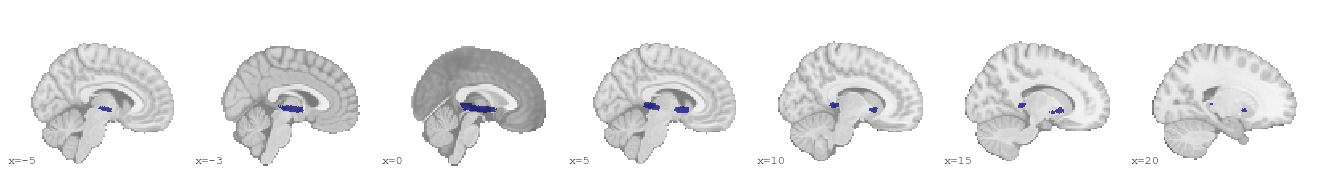

In [361]:
plotting.plot_roi(tract_reresampled, display_mode='x')

In [268]:
mapping.to_csv(join(PROJ_DIR, DATA_DIR, 'variable_to_nifti_mapping.csv'))

In [ ]:
destrieux_vol_nimg = nib.load(destrieux_vol.maps)
destrieux_vol_arra = destrieux_vol_nimg.get_fdata()

In [86]:
desikan_vol_nimg = nib.load(desikan.images[0])
desikan_vol_arra = desikan_vol_nimg.get_fdata()

In [201]:
!ls  /Volumes/projects_herting/LABDOCS/PROJECTS/ABCD/ABCD_Outcomes/ABCD-brain\ outcomes/AtlasTrack/fibertract_visualization

ABCD Atlas Track ROIs   Elisabeth_sig_tracts
ABCD Atlas Track Tracts image_files


In [307]:
mapping[mapping['atlas_value'] == 101]['atlas_description']

mrisdp_99                                                  b'G_pariet_inf-Angular'
mrisdp_401                                                 b'G_pariet_inf-Angular'
mrisdp_1005                                                b'G_pariet_inf-Angular'
rsfmri_var_cortgordon_gp101lh                                         CinguloOperc
dmri_dtifa_fiberat_fxrh          FiberNumber
101    R fornix
Name: LongFiberNam...
dmri_dtimd_fiberat_fxrh          FiberNumber
101    R fornix
Name: LongFiberNam...
dmri_dtivol_fiberat_fxrh         FiberNumber
101    R fornix
Name: LongFiberNam...
Name: atlas_description, dtype: object